In [1]:
import matplotlib.pyplot as plt
import utils

In [2]:
ALL_DATA_SIZES = [100 * i for i in range(1, 11)]

In [3]:
price_per_gpu = {
    'aws': {
        True: {
            1: 3.06,
            8: 24.48,
        },
        False: {
            1: 0.996600,
            8: 7.344,
        }
    },
    'gcp': {
        True: {
            1: 2.85,
            8: 22.80,
        },
        False: {
            1: 0.851,
            8: 6.808,
        }
    },
    'azure': {
        True: {
            1: 3.06,
            8: 26.928,
        },
        False: {
            1: 0.60313,
            8: 5.348,
        }
    }
}

In [4]:
def measure_costs(intra_region, src_cloud, src_continent, dst_cloud,
                  dst_continent, label, compute_cost):
    costs = []
    for data_size in ALL_DATA_SIZES:
        result = utils.analyze(data_size, intra_region, src_cloud,
                               src_continent, dst_cloud, dst_continent)
        cost = float(result.split(',')[-1])
        assert cost >= 0
        costs.append(cost / compute_cost)
    plt.plot(ALL_DATA_SIZES, costs, marker='o', label=label)

In [5]:
def plot_costs_for_cloud(src_cloud, on_demand, num_gpus):
    compute_cost = price_per_gpu[src_cloud][on_demand][num_gpus] * 100
    
    # Intra-region in North America.
    measure_costs(True, src_cloud=src_cloud, src_continent='north_america',
                  dst_cloud=src_cloud, dst_continent='north_america',
                  label='Intra-region in North America',
                  compute_cost=compute_cost)

    # Inter-region from North America.
    measure_costs(False, src_cloud=src_cloud, src_continent='north_america',
                  dst_cloud=src_cloud, dst_continent='europe',
                  label='Inter-region beginning in North America',
                  compute_cost=compute_cost)

    # North America to Internet.
    measure_costs(False, src_cloud=src_cloud, src_continent='north_america',
                  dst_cloud='internet', dst_continent='north_america',
                  label='North America to Internet',
                  compute_cost=compute_cost)

    plt.xlabel('Data Size (GB)')
    plt.ylabel('Data Transfer Cost / Compute Cost')
    plt.xlim(100, 1000)
    plt.ylim(0.0, 1.0)
    plt.legend()

    plt.show()

## 1 V100 for 100 hours (on-demand)

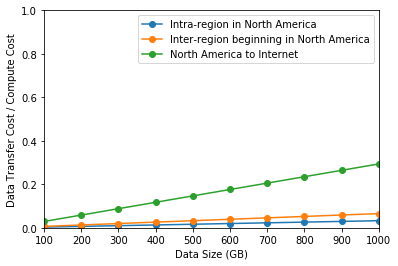

In [6]:
plot_costs_for_cloud('aws', True, 1)

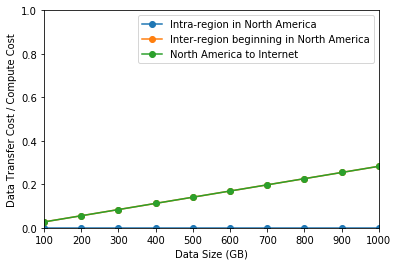

In [7]:
plot_costs_for_cloud('azure', True, 1)

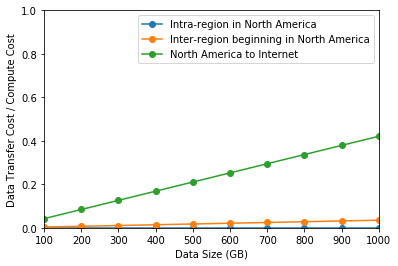

In [8]:
plot_costs_for_cloud('gcp', True, 1)

## 8 V100s for 100 hours (on-demand)

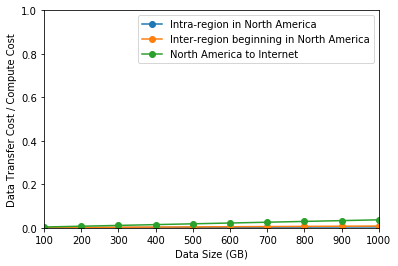

In [9]:
plot_costs_for_cloud('aws', True, 8)

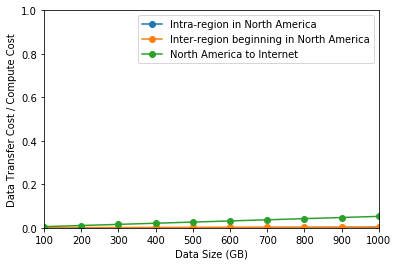

In [10]:
plot_costs_for_cloud('gcp', True, 8)

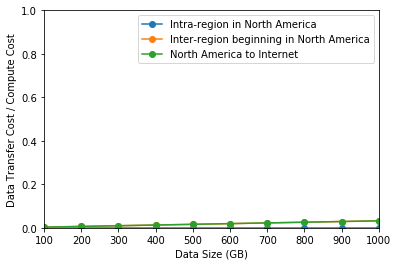

In [11]:
plot_costs_for_cloud('azure', True, 8)

## 1 V100 for 100 hours (spot)

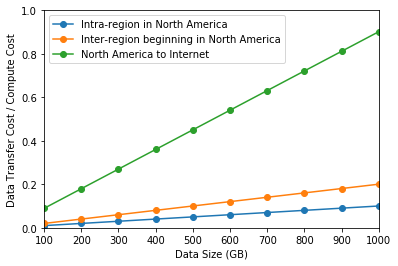

In [12]:
plot_costs_for_cloud('aws', False, 1)

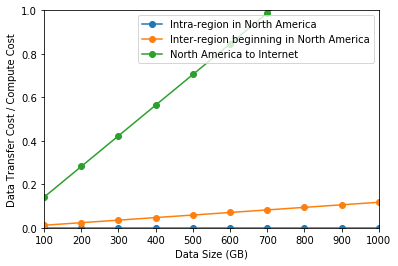

In [13]:
plot_costs_for_cloud('gcp', False, 1)

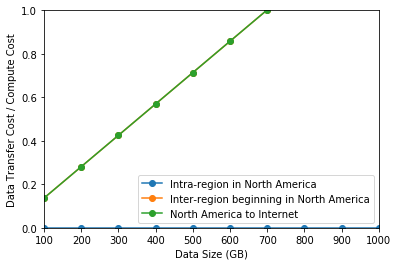

In [14]:
plot_costs_for_cloud('azure', False, 1)

## 8 V100s for 100 hours (spot)

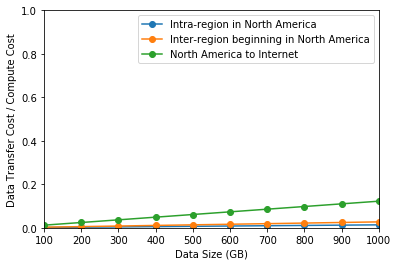

In [15]:
plot_costs_for_cloud('aws', False, 8)

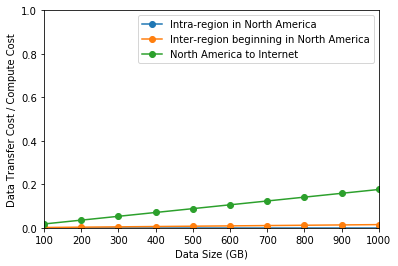

In [16]:
plot_costs_for_cloud('gcp', False, 8)

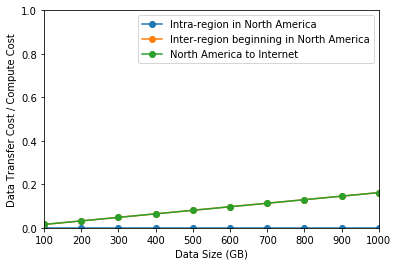

In [17]:
plot_costs_for_cloud('azure', False, 8)